In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import *
import networkx as nx
from scipy.stats import beta
import time
from numpy.linalg import eigh

In [2]:
rho0 = 0.1
gamma = 1
sizes = [20, 30, 40, 50, 60, 70, 80, 90, 100]
mean_deg = [2, 3, 4, 5, 6, 7, 8, 9, 10]
nsamples = 1000

In [3]:
# simple contagion
conv = {}
for n in sizes:
    for k in mean_deg:
        A = erdos_renyi(n, k)
        x0 = np.zeros(n)
        x0[random.sample(range(n), int(rho0*n))] = 1

        nu = eigh(A)[0][-1]
        b = 2 * gamma / nu

        sc = lambda nu, b: 1 - (1 - b) ** nu
        c = sc(np.arange(n), b)

        x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100)

        p_c = np.ones((2, n))
        p_rho = np.array([2, 5])

        rho0 = beta(p_rho[0], p_rho[1]).rvs()
        A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))
        samples, l = infer_adjacency_matrix(
            x, A0, p_rho, p_c, nsamples=nsamples, burn_in=0, skip=10, return_likelihood=True
        )
        h = []
        for i in range(len(samples)):
            h.append(hamming_distance(samples[0], samples[i]))
        conv[(n, k)] = h

Acceptance ratio is 0.09279279279279279
Acceptance ratio is 0.031331331331331334
Acceptance ratio is 0.06646646646646646
Acceptance ratio is 0.08768768768768768
Acceptance ratio is 0.12152152152152153
Acceptance ratio is 0.12612612612612611
Acceptance ratio is 0.15185185185185185
Acceptance ratio is 0.10260260260260261
Acceptance ratio is 0.1812812812812813
Acceptance ratio is 0.06976976976976977
Acceptance ratio is 0.2059059059059059
Acceptance ratio is 0.1944944944944945
Acceptance ratio is 0.1841841841841842
Acceptance ratio is 0.14104104104104104
Acceptance ratio is 0.24644644644644645
Acceptance ratio is 0.12682682682682683
Acceptance ratio is 0.4078078078078078
Acceptance ratio is 0.09289289289289289
Acceptance ratio is 0.1087087087087087
Acceptance ratio is 0.14314314314314314
Acceptance ratio is 0.14884884884884886
Acceptance ratio is 0.16246246246246246
Acceptance ratio is 0.191991991991992
Acceptance ratio is 0.2656656656656657
Acceptance ratio is 0.372972972972973
Acceptance

Text(0, 0.5, 'Hamming distance')

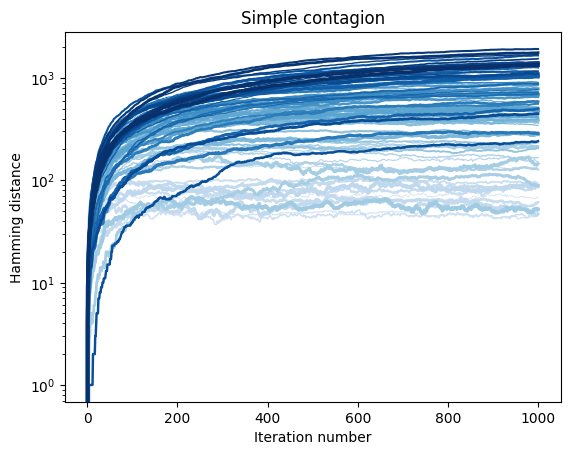

In [9]:
plt.figure()
for (n, k), h in conv.items():
    plt.semilogy(
        h,
        label=f"({n}, {k})",
        linewidth=k*0.25,
        color=plt.cm.Blues((n + k)/(sizes[-1] + mean_deg[-1])),
    )
plt.title("Simple contagion")
plt.xlabel("Iteration number")
plt.ylabel("Hamming distance")
# plt.savefig("Figures/simple_contagion_distances.png", dpi=1000)
# plt.savefig("Figures/simple_contagion_distances.pdf", dpi=1000)

In [5]:
# threshold contagion
nsamples = 20000

tau = 3
cc = lambda nu, tau, beta: beta * (nu >= tau)
c = cc(np.arange(n), tau, b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100, random_seed=None)

p_c = np.ones((2, n))
p_rho = np.array([2, 5])

rho0 = beta(p_rho[0], p_rho[1]).rvs()

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))
samples2, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=nsamples, burn_in=0, skip=10, return_likelihood=True
)

0.5775698708625275
Acceptance ratio is 0.4786489324466223


plot 0 finished
plot 1000 finished
plot 2000 finished
plot 3000 finished
plot 4000 finished
plot 5000 finished
plot 6000 finished
plot 7000 finished
plot 8000 finished
plot 9000 finished


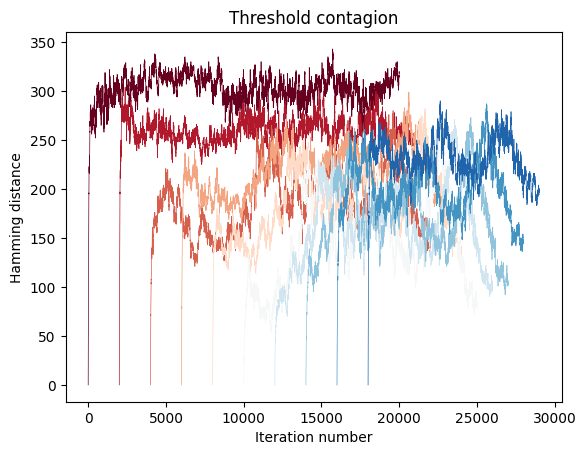

In [6]:
plt.figure()
for i in range(0, int(len(samples2) / 2), 1000):
    h = []
    idx = []
    for j in range(i, len(samples2)):
        h.append(hamming_distance(samples2[i], samples2[j]))
        idx.append(i + j)
    plt.plot(
        idx,
        h,
        label=f"Distance from iteration {i}",
        linewidth=0.5,
        color=plt.cm.RdBu((2 * i / len(samples2))),
    )
    print(f"plot {i} finished")
plt.title("Threshold contagion")
plt.xlabel("Iteration number")
plt.ylabel("Hamming distance")
plt.savefig("Figures/threshold_contagion_distances.png", dpi=1000)
plt.savefig("Figures/threshold_contagion_distances.pdf", dpi=1000)